In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Step 1: Load the datasets
customers = pd.read_csv("C:/Users/NELAKURTHI MANOJ/Downloads/Customers.csv")
products = pd.read_csv("C:/Users/NELAKURTHI MANOJ/Downloads/Products.csv")
transactions = pd.read_csv("C:/Users/NELAKURTHI MANOJ/Downloads/Transactions.csv")

In [3]:
# Step 2: Explore the datasets
print("\nCustomers Dataset Info:\n")
print(customers.info())
print(customers.head())


Customers Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15


In [4]:
print("\nProducts Dataset Info:\n")
print(products.info())
print(products.head())


Products Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31


In [5]:
print("\nTransactions Dataset Info:\n")
print(transactions.info())
print(transactions.head())


Transactions Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB
None
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070   

In [6]:
# Step 3: Check for missing values
print("\nMissing Values in Customers:\n", customers.isnull().sum())
print("\nMissing Values in Products:\n", products.isnull().sum())
print("\nMissing Values in Transactions:\n", transactions.isnull().sum())


Missing Values in Customers:
 CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Missing Values in Products:
 ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Missing Values in Transactions:
 TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [7]:
# Step 4: Basic statistics
print("\nSummary Statistics for Customers:\n")
print(customers.describe())
print("\nSummary Statistics for Products:\n")
print(products.describe())
print("\nSummary Statistics for Transactions:\n")
print(transactions.describe())


Summary Statistics for Customers:

       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3

Summary Statistics for Products:

            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000

Summary Statistics for Transactions:

          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497.76000


C:\Users\NELAKURTHI MANOJ\AppData\Local\Temp\ipykernel_16312\224571500.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Region', data=customers, palette='Set2')


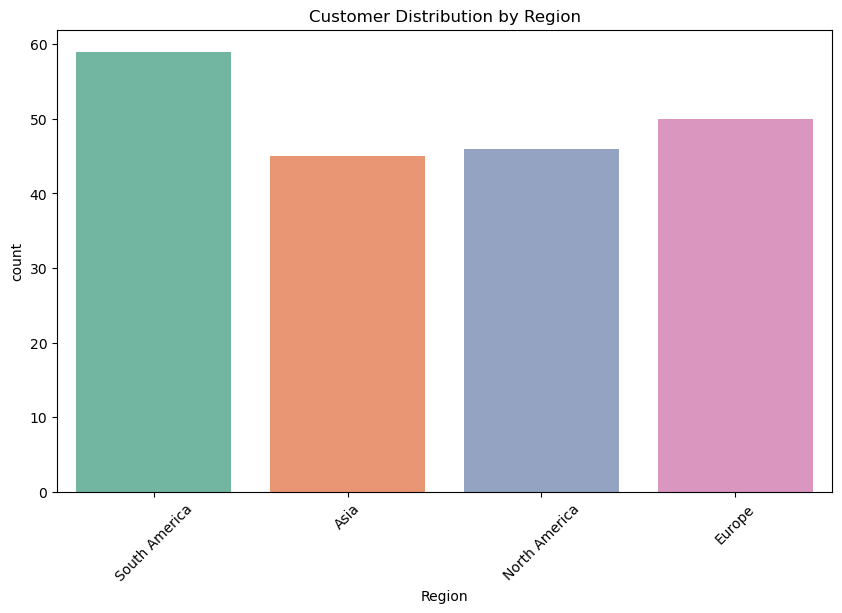

In [8]:
# Step 5: Initial visualizations
plt.figure(figsize=(10, 6))
sns.countplot(x='Region', data=customers, palette='Set2')
plt.title('Customer Distribution by Region')
plt.xticks(rotation=45)
plt.show()

In [9]:
# Clean and preprocess data
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [10]:
# Merge data for analysis
merged_data = pd.merge(transactions, customers, on='CustomerID')
merged_data = pd.merge(merged_data, products, on='ProductID')

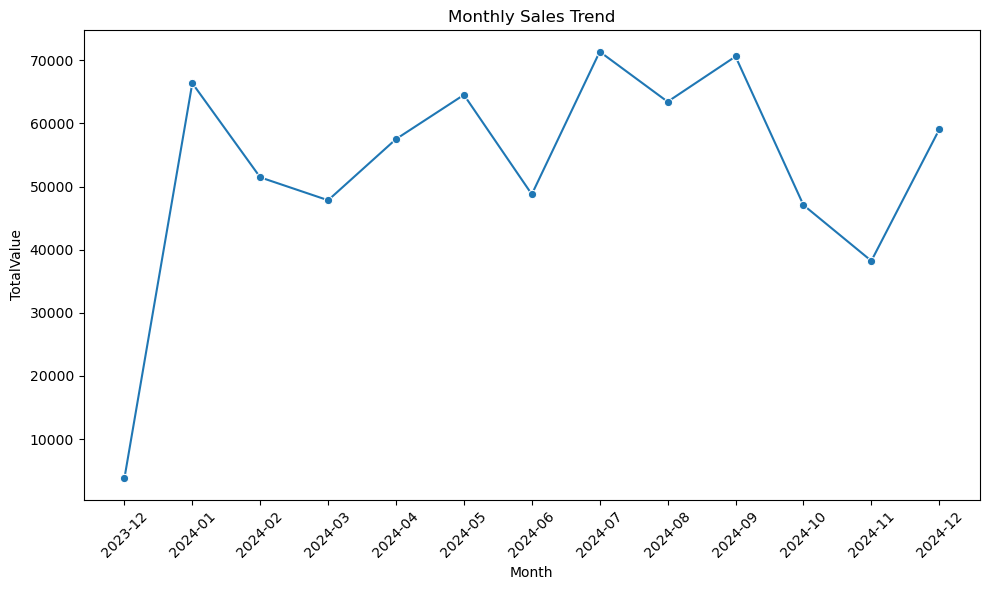

In [11]:
# Convert to period and group by month
transactions['Month'] = transactions['TransactionDate'].dt.to_period('M')
monthly_sales = transactions.groupby('Month')['TotalValue'].sum().reset_index()

# Convert 'Month' to a string for plotting
monthly_sales['Month'] = monthly_sales['Month'].astype(str)

# Plot the data
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_sales, x='Month', y='TotalValue', marker='o')
plt.title('Monthly Sales Trend')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

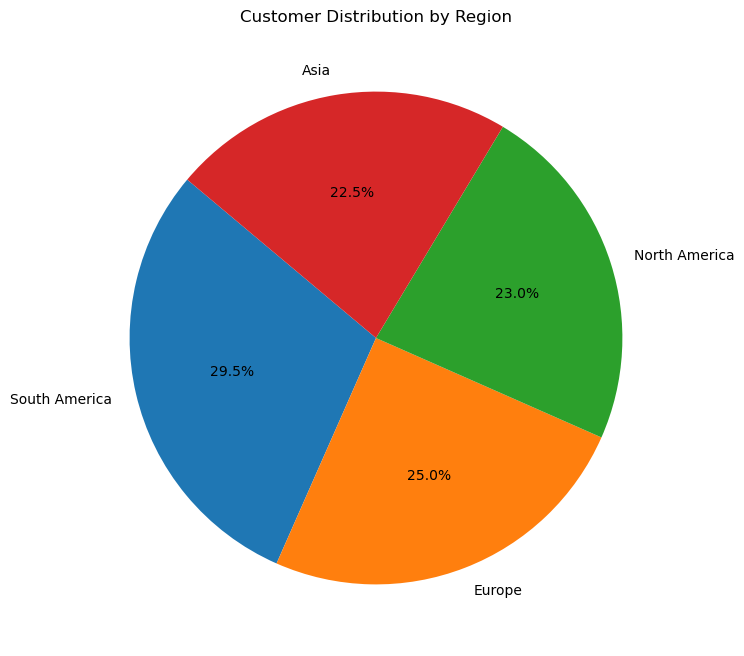

In [12]:
# Step 6: Derive actionable insights

#insight 1

# Assuming `region_count` is already defined as follows:
region_count = customers['Region'].value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 8))  # Set the figure size
plt.pie(region_count.values, labels=region_count.index, autopct='%1.1f%%', startangle=140)
plt.title('Customer Distribution by Region')  # Add a title
plt.show()


C:\Users\NELAKURTHI MANOJ\AppData\Local\Temp\ipykernel_16312\3665445117.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


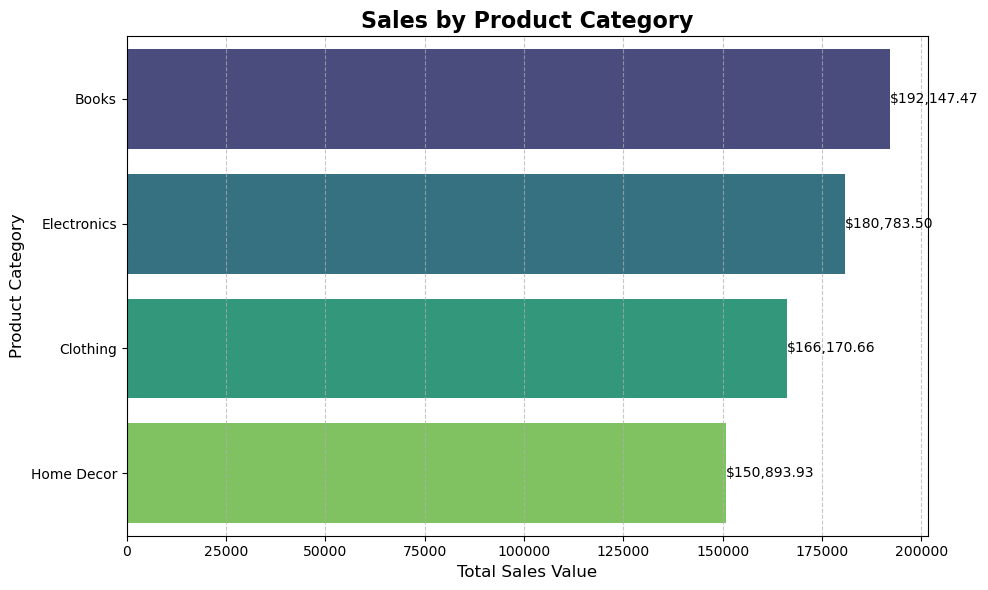

In [13]:
#insight 2
# Group and summarize category sales
category_sales = transactions.merge(products, on='ProductID')
category_sales_summary = category_sales.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)

# Plotting the sales by product category
plt.figure(figsize=(10, 6))
sns.barplot(
    x=category_sales_summary.values, 
    y=category_sales_summary.index, 
    palette="viridis"
)

# Add sales values on the bars
for index, value in enumerate(category_sales_summary.values):
    plt.text(
        value, index, f"${value:,.2f}", 
        va='center', ha='left', fontsize=10, color='black'
    )

# Customize the chart
plt.title('Sales by Product Category', fontsize=16, fontweight='bold')
plt.xlabel('Total Sales Value', fontsize=12)
plt.ylabel('Product Category', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add light gridlines for readability
plt.tight_layout()

# Display the chart
plt.show()

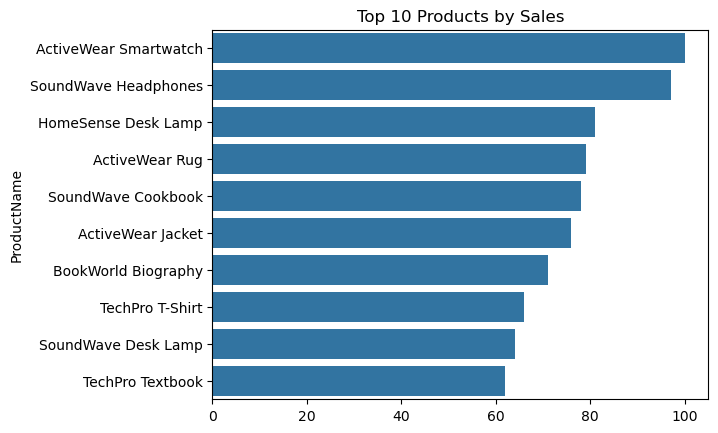

In [14]:
# Top-selling products
top_products = merged_data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_products.values, y=top_products.index)
plt.title('Top 10 Products by Sales')
plt.show()

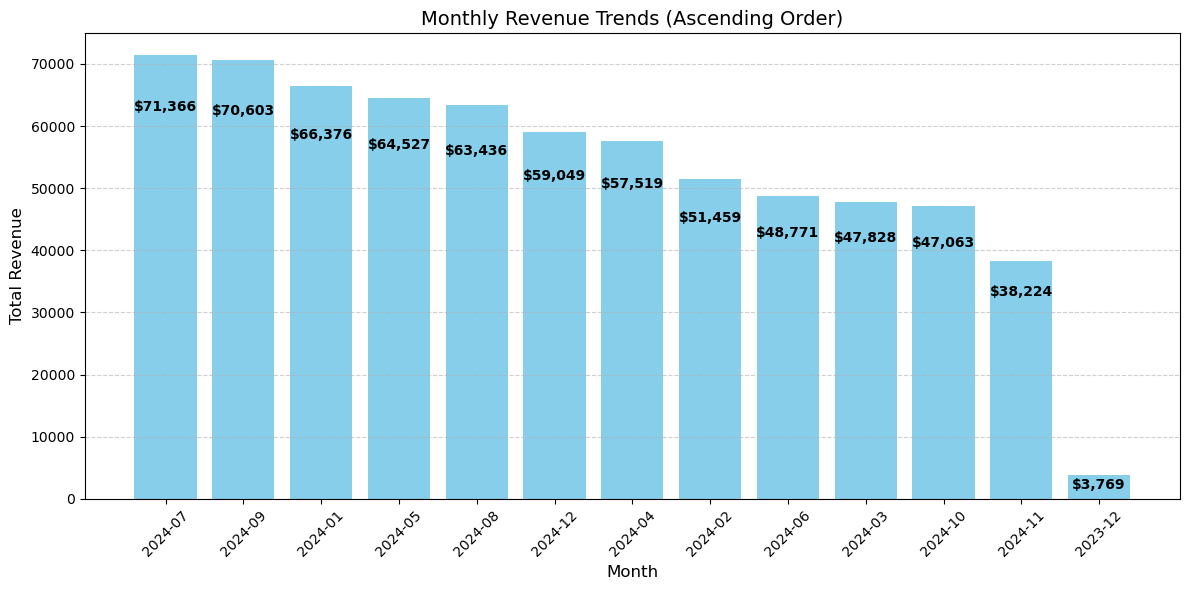

In [15]:
# Insight 3: High revenue months
# Extract month from the TransactionDate column
merged_data['Month'] = merged_data['TransactionDate'].dt.to_period('M')  # Period format for Year-Month

# Group by month and calculate total revenue
revenue_per_month = merged_data.groupby('Month')['TotalValue'].sum().sort_values(ascending=False)  # Sort by Total Revenue in ascending order

# Plot revenue trends by month
plt.figure(figsize=(12, 6))
bars = plt.bar(revenue_per_month.index.astype(str), revenue_per_month.values, color='skyblue')

# Add total revenue values inside the bars
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() - (bar.get_height() * 0.1),  # Position the text slightly below the top of the bar
        f"${int(bar.get_height()):,}",
        ha='center',
        va='top',
        fontsize=10,
        color='black',
        fontweight='bold'
    )

# Customize the plot
plt.title('Monthly Revenue Trends (Ascending Order)', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)  # Add a grid for better readability
plt.show()

In [16]:
# Insight 4: Customer retention via transaction behavior
high_value_customers = transactions.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 High-Value Customers:\n", high_value_customers)


Top 10 High-Value Customers:
 CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
C0188     7111.32
C0059     7073.28
C0028     6819.57
C0099     6715.72
C0165     6708.10
Name: TotalValue, dtype: float64


C:\Users\NELAKURTHI MANOJ\AppData\Local\Temp\ipykernel_16312\1801308082.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


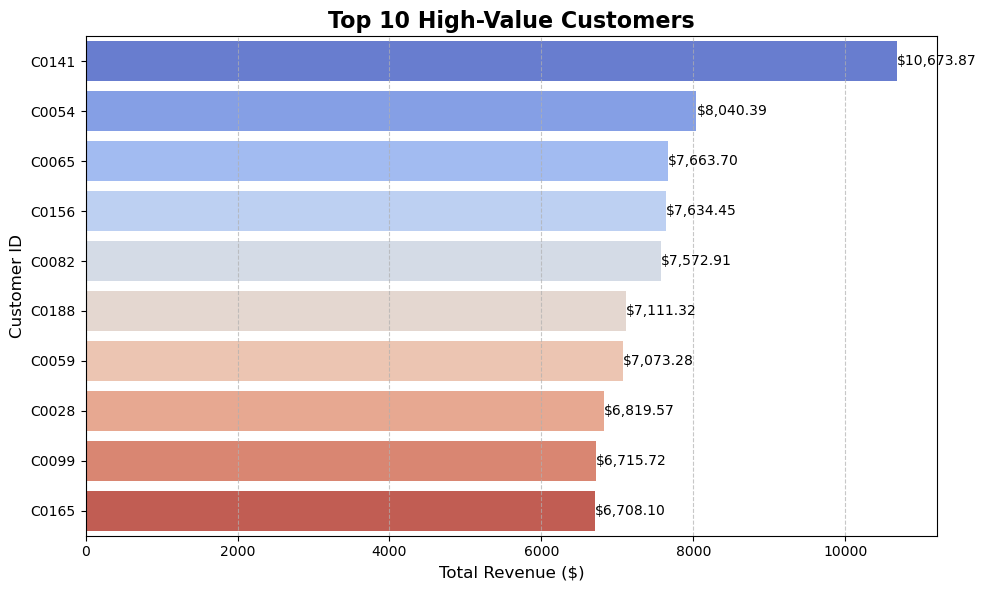

In [17]:
# Data: High-value customers
high_value_customers = transactions.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(10)

# Plotting the high-value customers
plt.figure(figsize=(10, 6))
sns.barplot(
    x=high_value_customers.values, 
    y=high_value_customers.index, 
    palette="coolwarm"
)

# Add total value labels to the bars
for index, value in enumerate(high_value_customers.values):
    plt.text(
        value, index, f"${value:,.2f}", 
        va='center', ha='left', fontsize=10, color='black'
    )

# Customize the chart
plt.title('Top 10 High-Value Customers', fontsize=16, fontweight='bold')
plt.xlabel('Total Revenue ($)', fontsize=12)
plt.ylabel('Customer ID', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Light gridlines for readability
plt.tight_layout()

# Show the plot
plt.show()


In [18]:
# Insight 5: Product pricing and profitability
product_sales = transactions.groupby('ProductID')['TotalValue'].sum().reset_index()
product_sales = product_sales.merge(products, on='ProductID')
product_sales['Profitability'] = product_sales['TotalValue'] / product_sales['Price']
low_priced_high_demand = product_sales.sort_values(by='Profitability', ascending=False).head(5)
print("\nTop 5 Low-Priced but High-Demand Products:\n", low_priced_high_demand)


Top 5 Low-Priced but High-Demand Products:
    ProductID  TotalValue            ProductName     Category   Price  \
53      P054      2635.8     SoundWave Cookbook        Books   57.30   
58      P059     13947.2        SoundWave Jeans     Clothing  303.20   
28      P029     19513.8     TechPro Headphones  Electronics  433.64   
56      P057     10307.1  ActiveWear Smartphone  Electronics  239.70   
47      P048     17905.2       TechPro Cookbook        Books  416.40   

    Profitability  
53           46.0  
58           46.0  
28           45.0  
56           43.0  
47           43.0  


C:\Users\NELAKURTHI MANOJ\AppData\Local\Temp\ipykernel_16312\3433334718.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


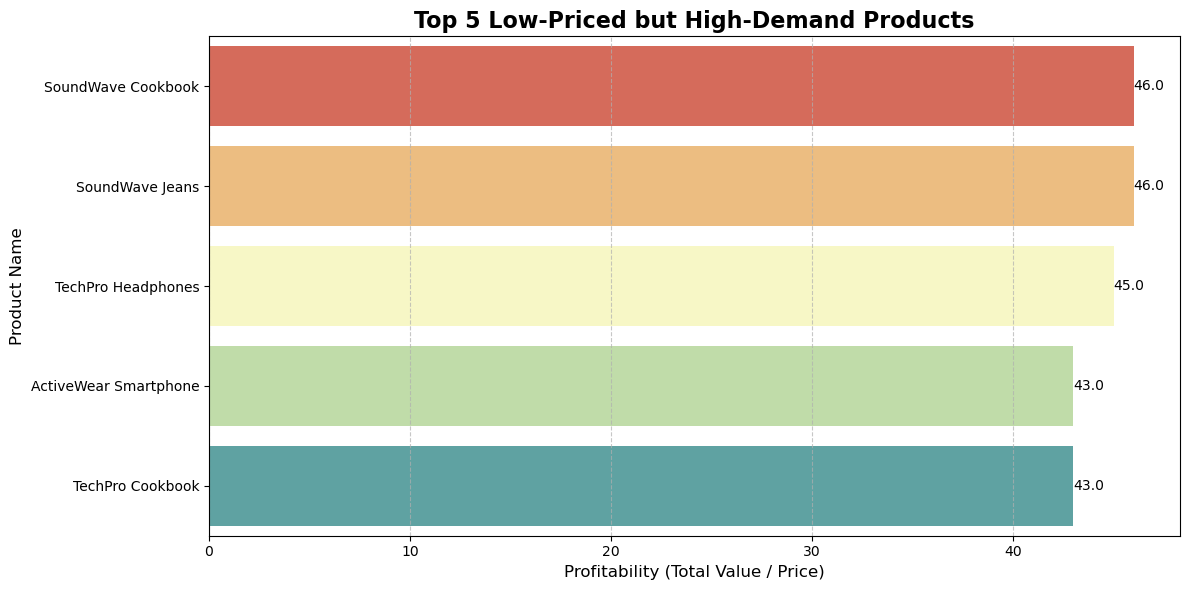

In [19]:
# Plotting the top 5 low-priced but high-demand products
plt.figure(figsize=(12, 6))
sns.barplot(
    x=low_priced_high_demand['Profitability'], 
    y=low_priced_high_demand['ProductName'], 
    palette="Spectral"
)

# Add profitability values to the bars
for index, value in enumerate(low_priced_high_demand['Profitability']):
    plt.text(
        value, index, f"{value:.1f}", 
        va='center', ha='left', fontsize=10, color='black'
    )

# Customize the chart
plt.title('Top 5 Low-Priced but High-Demand Products', fontsize=16, fontweight='bold')
plt.xlabel('Profitability (Total Value / Price)', fontsize=12)
plt.ylabel('Product Name', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()
